# 01 Import Libraries and Dataframe

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
#Import Orders, Products, & Customers dataframe
data_path = r'/Users/Nick/Documents/CareerFoundry/Immersion 4/Instacart Basket Analysis 11.11.21/02 Data/Prepared Data'
ords_prods_cust = pd.read_pickle(os.path.join(data_path, 'orders_products_customers.pkl'))

In [5]:
pd.options.display.max_columns = 40

In [6]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy day,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


# 02 Visualizations

## 02.01 order_hour_of_day Histogram

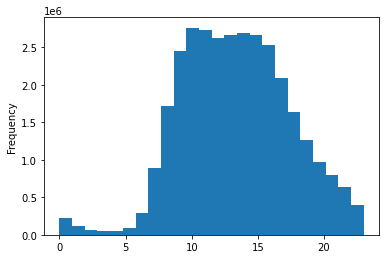

In [15]:
hod_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram indicates the number of orders during each hour of the day. There is an ordering peak from 10:00 to 15:00.

## 02.02 loyalty_flag Bar Chart

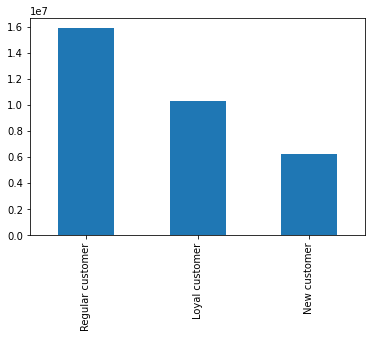

In [16]:
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

## 02.03 prices v. order_hour_of_day Line Chart

In [17]:
#Create 80/20 split sample sets
np.random.seed(7)
dev = np.random.rand(len(ords_prods_cust)) <= 0.8
big = ords_prods_cust[dev] #80%
small = ords_prods_cust[~dev] #20%

In [19]:
#Check split
len(big) + len(small) == len(ords_prods_cust)

True

In [21]:
#Reduce sample to needed columns
df1 = small[['prices', 'order_hour_of_day']]
df1.head()

,prices,order_hour_of_day
4,9.0,15
11,4.4,8
15,4.4,15
18,4.4,14
21,4.7,8


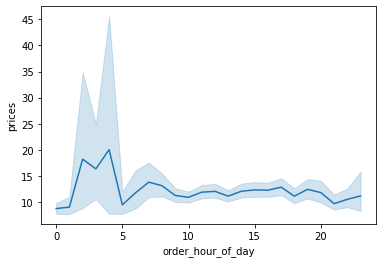

In [22]:
#Create line chart with 20% sample
price_hod_line = sns.lineplot(data = df1, x = 'order_hour_of_day', y = 'prices')

## 02.04 n_dependents v. age Line Chart

In [24]:
#Reduce sample dataframe to needed columns
df2 = small[['age','n_dependants']]
df2.head()

,age,n_dependants
4,31,3
11,31,3
15,31,3
18,31,3
21,31,3


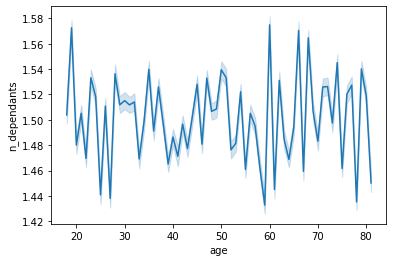

In [25]:
#Create line chart
dep_age_line = sns.lineplot(data = df2, x = 'age', y = 'n_dependants')

#### This line chart shows the expected number of dependents for a customer based on their age. There seems to be a lot of fluctuation, but the range is very tight--from 1.4 to 1.6. So, there is no significant correlation between age and number of dependents, and there is an average of around 1.5 dependents in each household, regardless of the customer's age.

## 02.05 income v. age Scatterplot

In [26]:
#Reduce sample dataframe to needed columns
df3 = small[['income', 'age']]
df3.head()

,income,age
4,40423,31
11,40423,31
15,40423,31
18,40423,31
21,40423,31


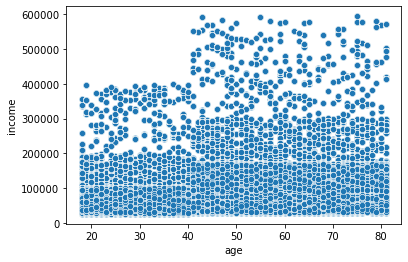

In [27]:
#Create scatterplot
inc_age_scatter = sns.scatterplot(data = df3, x = 'age', y = 'income')

#### The scatterplot shows all ordered pairs in the form (age, income). We see a jump in income around the age of 40 as shown by the apparent step-up in the data chunks. For instance, the income concentration between 100k and 200k for 20-40 year olds appears to jump to 200k-300k once the age is passed 40. Or, more apparent is a similar jump in the max income values from 400k to 600k, which occurs just passed the age of 40.

# 03 Export Charts

In [29]:
vis_path = r'/Users/Nick/Documents/CareerFoundry/Immersion 4/Instacart Basket Analysis 11.11.21/04 Analysis/Visualizations'
hod_hist.figure.savefig(os.path.join(vis_path, 'hour_of_day_histogram.png'))
loyalty_bar.figure.savefig(os.path.join(vis_path, 'loyalty_bar.png'))
price_hod_line.figure.savefig(os.path.join(vis_path, 'price_v_hour_of_day_line.png'))
dep_age_line.figure.savefig(os.path.join(vis_path, 'dependents_v_age_line.png'))
inc_age_scatter.figure.savefig(os.path.join(vis_path, 'income_v_age_scatterplot.png'))